In [1]:
import numpy as np
import pandas as pd
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)

input
input\evaluation
input\test
input\training


In [2]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [3]:
#已解決的ID
solved_id=set()
solved_eva_id=set()

In [4]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

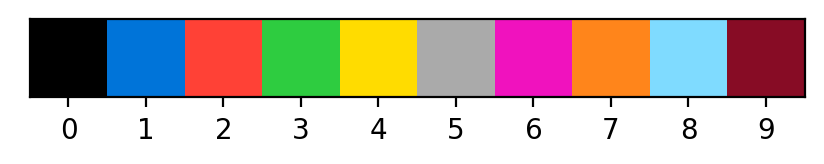

In [5]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [6]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [7]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [8]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

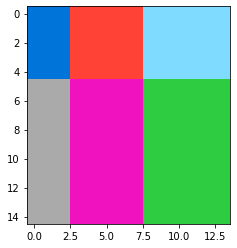

In [39]:
a=Evals[340]["train"][2]["input"]
plot_picture(a)

In [40]:
a_array=np.array(a)
a_array[:,1]
a_array.shape[0]

15

In [41]:
target=a_array[0,:]
delete1=[]
for i in range(1,a_array.shape[0]):
    if (a_array[i,:]!=target).any():
        target=a_array[i,:]
    else:
        delete1.append(i)
delete2=[]
target=a_array[:,0]
for i in range(1,a_array.shape[1]):
    if (a_array[:,i]!=target).any():
        target=a_array[:,i]
    else:
        delete2.append(i)
print(delete2)
a_array1=np.delete(a_array,delete1,0)
a_array2=np.delete(a_array1,delete2,1)
a_array2

[1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13]


array([[1, 2, 8],
       [5, 6, 3]])

In [48]:

def Solve_dim_summery(basic_task): 
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    for x, y in zip(Input,Output):
        x_array=np.array(x)
        y_array=np.array(y)
        target=x_array[0,:]
        delete1=[]
        for i in range(1,x_array.shape[0]):
            if (x_array[i,:]!=target).any():
                target=x_array[i,:]
            else:
                delete1.append(i)
        delete2=[]
        target=x_array[:,0]
        for i in range(1,x_array.shape[1]):
            if (x_array[:,i]!=target).any():
                target=x_array[:,i]
            else:
                delete2.append(i)
        x_array1=np.delete(x_array,delete1,0)
        x_array2=np.delete(x_array1,delete2,1)
        if x_array2.tolist()!=y:
            return -1
    Test_Case_array=np.array(Test_Case)
    target=Test_Case_array[0,:]
    delete1=[]
    for i in range(1,Test_Case_array.shape[0]):
        if (Test_Case_array[i,:]!=target).any():
            target=Test_Case_array[i,:]
        else:
            delete1.append(i)
    delete2=[]
    target=Test_Case_array[:,0]
    for i in range(1,Test_Case_array.shape[1]):
        if (Test_Case_array[:,i]!=target).any():
            target=Test_Case_array[:,i]
        else:
            delete2.append(i)
    Test_Case_array1=np.delete(Test_Case_array,delete1,0)
    Test_Case_array2=np.delete(Test_Case_array1,delete2,1)
    return Test_Case_array2.tolist()


177 0


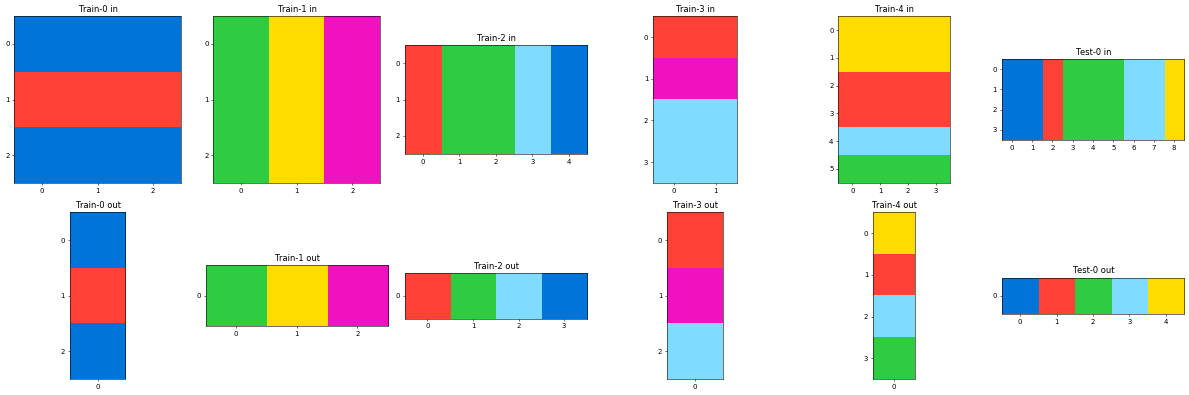

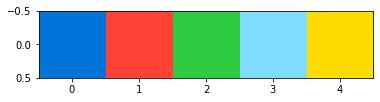

376 0


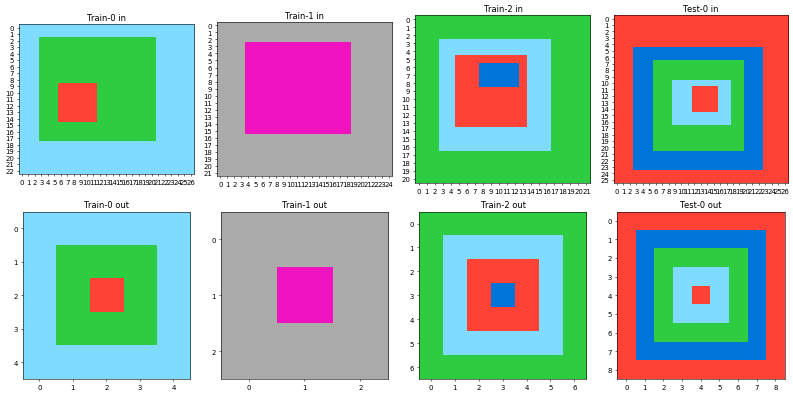

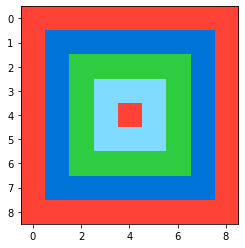

In [49]:
for i in range(400):

    task = Trains[i]
    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        a = Solve_dim_summery(basic_task)
        if a != -1 :
            print(i,j)
            plot_task(task)
            plot_picture(a)


314 0


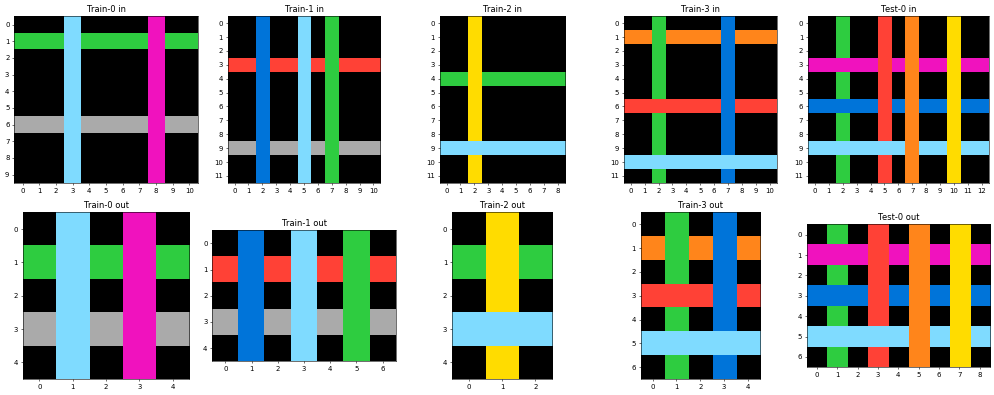

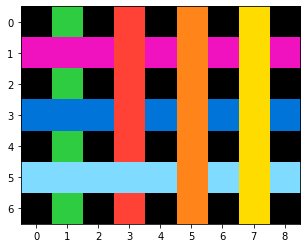

340 0


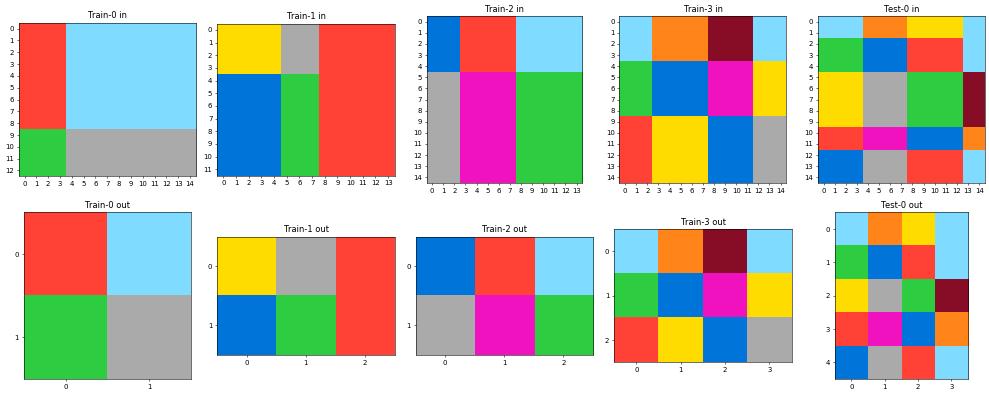

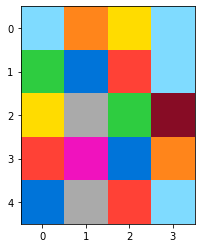

In [50]:
for i in range(400):

    task = Evals[i]
    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        a = Solve_dim_summery(basic_task)
        if a != -1 :
            print(i,j)
            plot_task(task)
            plot_picture(a)